## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
pat = [5,10,25]

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for ptime in pat:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    earlystop = EarlyStopping(monitor="val_loss", 
                          patience=ptime, 
                          verbose=1
                          )
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

# Collect results
    record ="patience: {}".format(str(ptime))
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    results[record]= {
            'train_loss':train_loss,
            'valid_loss':valid_loss,
            'train_acc':train_acc,
            'valid_acc':valid_acc
    }
    

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4599 - acc: 0.4893 - val_loss: 1.5765 - val_acc: 0.4456
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4198 - acc: 0.5049 - val_loss: 1.5590 - val_acc: 0.4531
Epoch 8/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.3854 - acc: 0.5187 - val_loss: 1.5381 - val_acc: 0.4567
Epoch 9/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.3525 - acc: 0.5280 - val_loss: 1.5227 - val_acc: 0.4690
Epoch 10/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.3216 - acc: 0.5397 - val_loss: 1.5163 - val_acc: 0.4673
Epoch 11/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.2934 - acc: 0.5517 - val_loss: 1.5017 - val_acc: 0.4679
Epoch 12/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.2654 - acc: 0.5618 - val_loss: 1.5008 - val_acc: 0.4744
Epoch 13/50
50000/50000 [======

50000/50000 [==============================] - 7s 145us/step - loss: 0.9257 - acc: 0.6888 - val_loss: 1.4636 - val_acc: 0.5009
Epoch 28/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.9066 - acc: 0.6965 - val_loss: 1.4650 - val_acc: 0.4952
Epoch 29/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.8856 - acc: 0.7052 - val_loss: 1.4762 - val_acc: 0.4989
Epoch 30/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.8663 - acc: 0.7122 - val_loss: 1.4886 - val_acc: 0.4955
Epoch 31/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.8464 - acc: 0.7203 - val_loss: 1.4883 - val_acc: 0.4968
Epoch 32/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.8282 - acc: 0.7282 - val_loss: 1.4752 - val_acc: 0.5033
Epoch 33/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.8065 - acc: 0.7356 - val_loss: 1.4860 - val_acc: 0.5035
Epoch 34/50
50000/50000 [==============

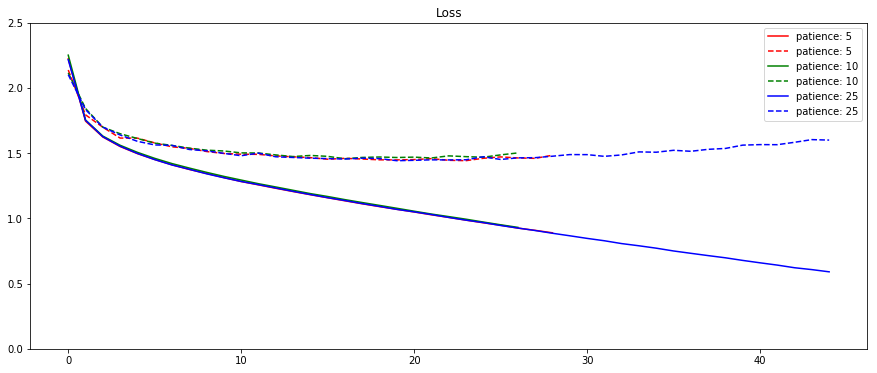

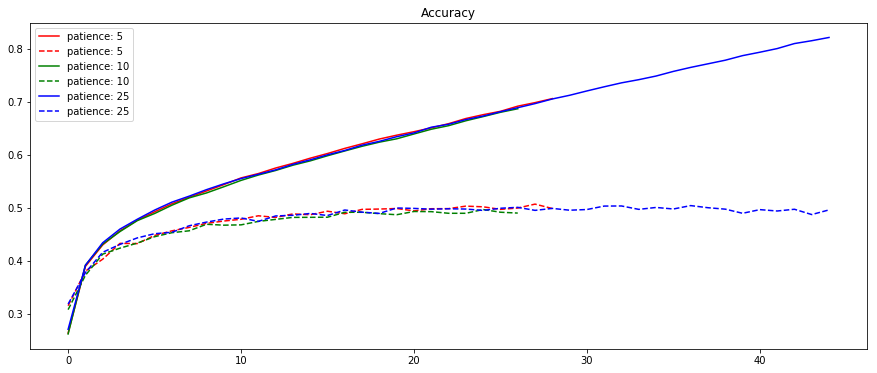

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(15,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 2.5])
plt.legend()
plt.show()

plt.figure(figsize=(15,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()